<a href="https://colab.research.google.com/github/phantom2906/Bharat-intern-VRN/blob/main/housepricepredictionVRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [28]:
dataset.shape


(2919, 13)

In [29]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 6
Float variables: 3


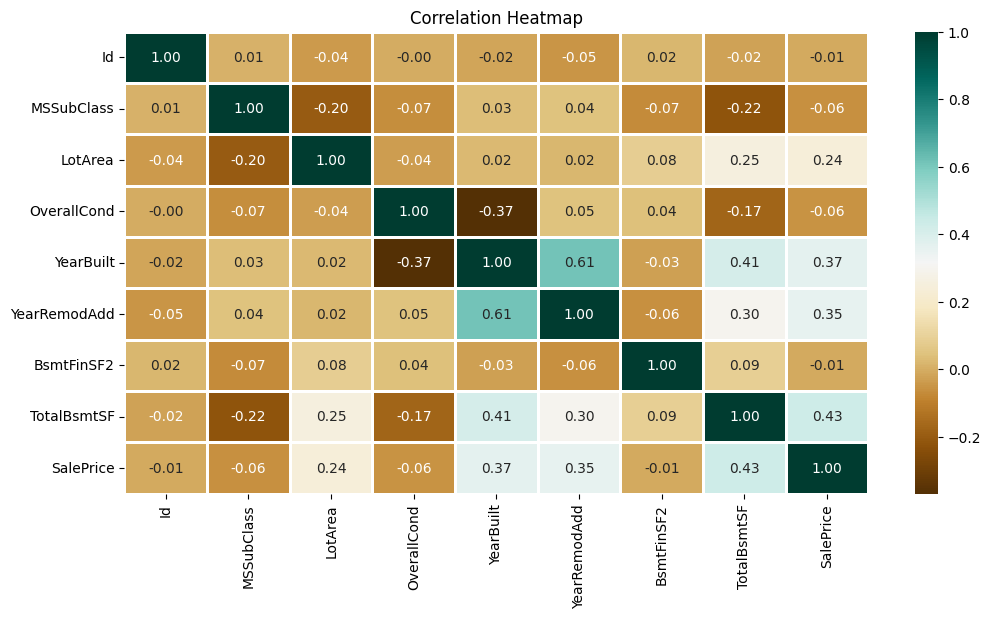

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_excel('HousePricePrediction.xlsx')

# Select only numeric columns for correlation
numeric_dataset = dataset.select_dtypes(include=['number'])

# Handle missing values by filling them with the mean of the column
numeric_dataset = numeric_dataset.fillna(numeric_dataset.mean())

# Compute the correlation matrix
corr_matrix = numeric_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.title('Correlation Heatmap')
plt.show()


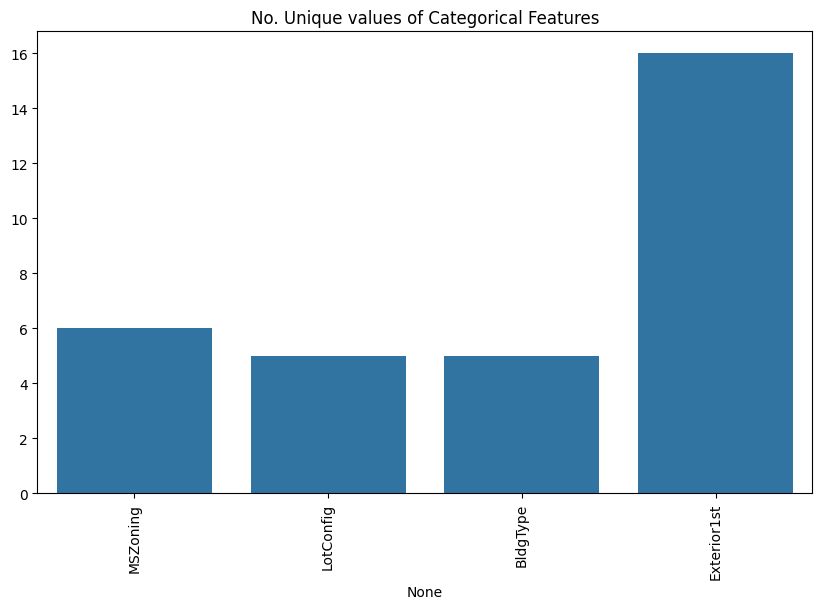

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming object_cols contains the names of the categorical columns
object_cols = dataset.select_dtypes(include=['object']).columns

# Calculate the number of unique values for each categorical feature
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)

# Plot the number of unique values for each categorical feature
plt.figure(figsize=(10, 6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)
plt.show()


<ipython-input-32-648a2c778247>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


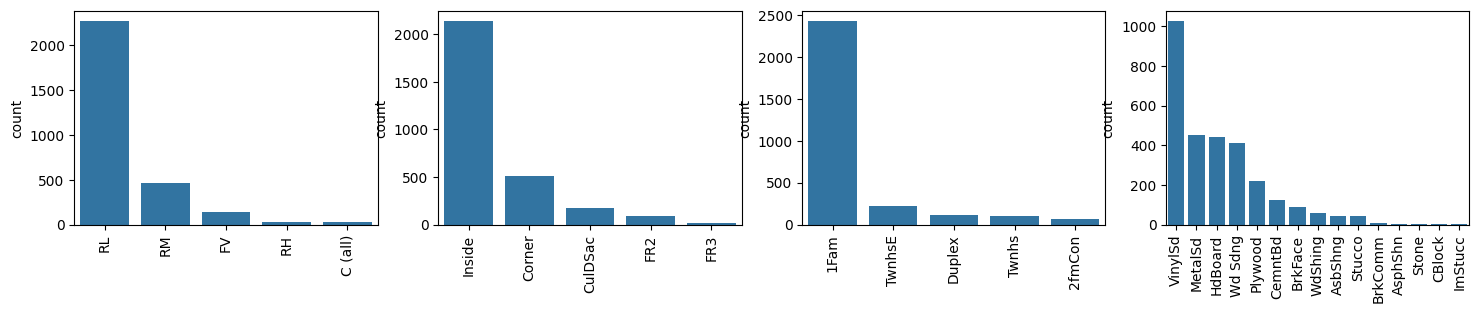

In [32]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


In [33]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)


In [34]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


In [35]:
new_dataset = dataset.dropna()


In [36]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [37]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [38]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [40]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [41]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.19176319202791647

In [42]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841599854


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model_nn = Sequential()
model_nn.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1))  # Output layer for regression

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history = model_nn.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=50, batch_size=32, verbose=1)

# Predict and evaluate
Y_pred_nn = model_nn.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid, Y_pred_nn))


Epoch 1/50
73/73 [==============================] - 3s 13ms/step - loss: 154553.3125 - val_loss: 100119.5156
Epoch 2/50
73/73 [==============================] - 1s 9ms/step - loss: 57930.0938 - val_loss: 44896.3984
Epoch 3/50
73/73 [==============================] - 1s 9ms/step - loss: 45400.8086 - val_loss: 38750.6328
Epoch 4/50
73/73 [==============================] - 1s 9ms/step - loss: 39646.1953 - val_loss: 32983.0547
Epoch 5/50
73/73 [==============================] - 1s 9ms/step - loss: 34435.2891 - val_loss: 29716.8535
Epoch 6/50
73/73 [==============================] - 1s 9ms/step - loss: 31714.1465 - val_loss: 29371.4609
Epoch 7/50
73/73 [==============================] - 0s 6ms/step - loss: 30862.2480 - val_loss: 29392.5566
Epoch 8/50
73/73 [==============================] - 1s 11ms/step - loss: 30317.3965 - val_loss: 29401.2109
Epoch 9/50
73/73 [==============================] - 0s 6ms/step - loss: 30097.4961 - val_loss: 29239.3652
Epoch 10/50
73/73 [=======================